In [85]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [86]:
import numpy as np
from torch import nn as nn
from torch import optim as optim
from torch.utils.data import random_split

## Loading Dataset

Training Data

In [87]:
data_train = datasets.MNIST(root='mnist_data',train=True,transform=ToTensor(),download=True)

Testing Data

In [88]:
data_test = datasets.MNIST(root='mnist_data',train=False,transform=ToTensor(),download=True)

In [89]:
data_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [90]:
data_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [91]:
data_train.data.shape

torch.Size([60000, 28, 28])

In [92]:
data_test.data.size()

torch.Size([10000, 28, 28])

In [93]:
import random
random.seed(1)

In [94]:
# Define data loaders
test_data = DataLoader(data_test, batch_size=100, shuffle=False)
val_split = 0.2  
train_set, val_set = random_split(data_train, [1 - val_split, val_split])
train_data = DataLoader(train_set, batch_size=100, shuffle=True)
val_data = DataLoader(val_set, batch_size=100, shuffle=False)

## Defining The Model Class

Architecture is simple with a single hidden layer and ReLU activation function.

In [95]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 100), 
            nn.ReLU(),           
            nn.Linear(100, 64),  # Hidden layer
            nn.ReLU(),           
            nn.Linear(64, 10)    
        )

    def forward(self, X):
        X = X.view(X.size(0),-1) #flattening operation
        return self.layers(X)

I have used Cross Entropy as Loss Function and Adam optimizer.

In [96]:
model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

## Training and Validation

In [97]:

epochs = 12
for epoch in range(epochs):
	for data, target in train_data:
		optimizer.zero_grad()
		outputs = model(data)
		loss = criterion(outputs, target)
		loss.backward()
		optimizer.step()
	

	with torch.inference_mode():
		correct = 0
		total = 0
		total_loss = 0
		for data,target in val_data:
			outputs = model(data)
			batch_loss = criterion(outputs,target)
			total_loss += batch_loss.item()
			_,predicted = torch.max(outputs.data,1)
			total += target.size(0)
			correct += (predicted == target).sum().item()
	
	model.train()
	
	print(f'Epoch [{epoch+1}/{epochs}] | Train Loss: {loss.item():.4f} | Val Loss: {total_loss/total:.4f} | Val Acc: {100*correct/total:.4f}%')
	

Epoch [1/12] | Train Loss: 0.1724 | Val Loss: 0.0024 | Val Acc: 93.3000%
Epoch [2/12] | Train Loss: 0.3148 | Val Loss: 0.0017 | Val Acc: 95.0500%
Epoch [3/12] | Train Loss: 0.0888 | Val Loss: 0.0014 | Val Acc: 95.8167%
Epoch [4/12] | Train Loss: 0.0873 | Val Loss: 0.0013 | Val Acc: 96.0333%
Epoch [5/12] | Train Loss: 0.1051 | Val Loss: 0.0011 | Val Acc: 96.7917%
Epoch [6/12] | Train Loss: 0.0466 | Val Loss: 0.0010 | Val Acc: 96.9833%
Epoch [7/12] | Train Loss: 0.1104 | Val Loss: 0.0011 | Val Acc: 96.6500%
Epoch [8/12] | Train Loss: 0.0120 | Val Loss: 0.0009 | Val Acc: 97.3167%
Epoch [9/12] | Train Loss: 0.0732 | Val Loss: 0.0010 | Val Acc: 97.2833%
Epoch [10/12] | Train Loss: 0.0172 | Val Loss: 0.0010 | Val Acc: 97.1000%
Epoch [11/12] | Train Loss: 0.0231 | Val Loss: 0.0010 | Val Acc: 97.1583%
Epoch [12/12] | Train Loss: 0.0396 | Val Loss: 0.0011 | Val Acc: 97.0583%


## Testing Model

In [98]:
# Test the model
with torch.inference_mode():
  correct, total = 0, 0
  for data, target in test_data:
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()
  print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 97.23%


## Visualization

In [99]:
import random
import matplotlib.pyplot as plt
random.seed(2)

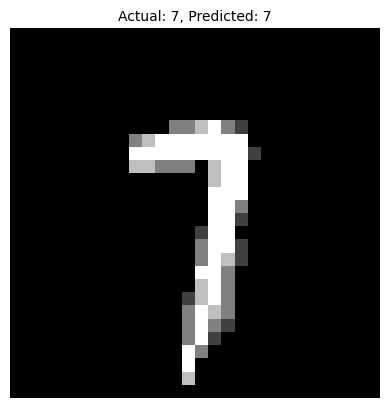

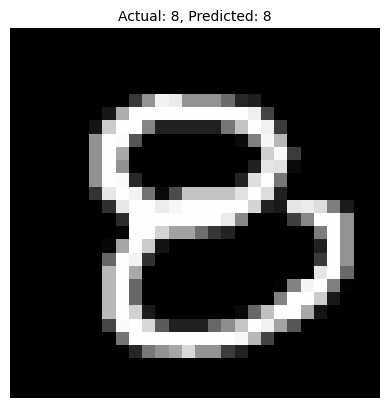

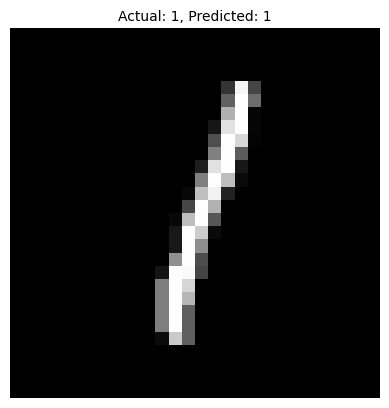

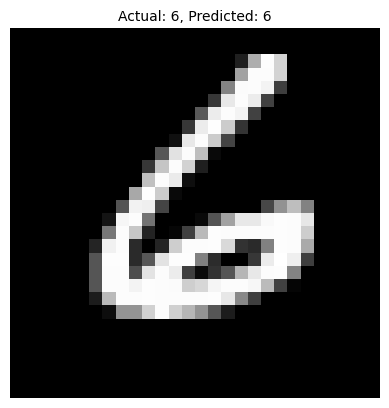

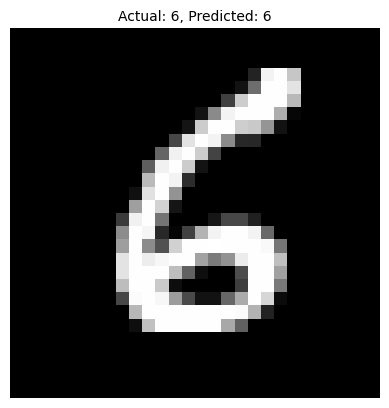

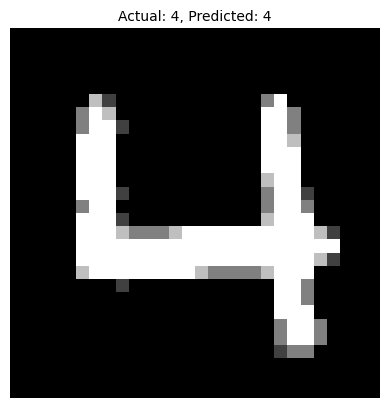

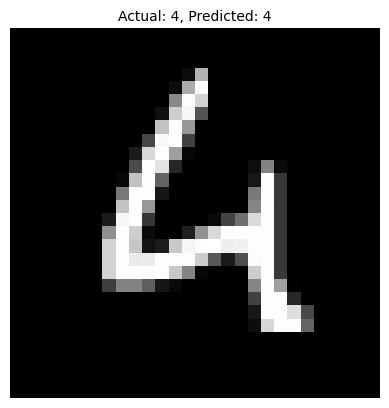

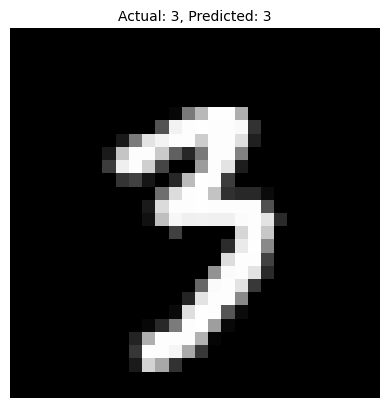

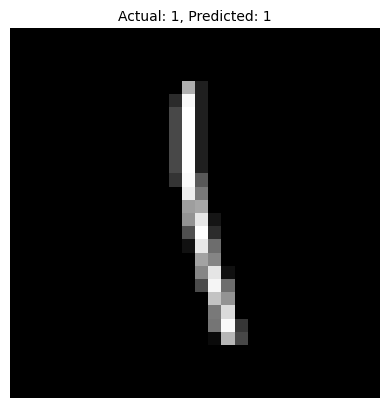

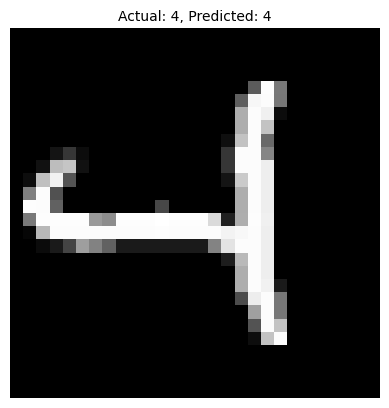

In [100]:
import matplotlib.pyplot as plt
import torch

def imshow(img):
	plt.imshow(img, cmap='gray', extent=(0, 28, 0, 28))  # Set extent for 28x28 image
	plt.axis('off')
	plt.title(f"Actual: {label}, Predicted: {predicted.item()}", fontsize=10)  # Set title with labels
	plt.show()

for i in range(0,10):
	# Get a random batch of data from the dataloader
	dataiter = iter(train_data)
	images, labels = next(dataiter)

	# Select a random index within the batch
	random_index = torch.randint(0, 100, size=(1,))  # Generate random index between 0 and 99 (inclusive)

	# Get the image and label for the chosen index
	image = images[random_index].squeeze()  # Extract image and remove batch dimension
	label = labels[random_index].item()  # Convert label tensor to scalar

	# Predict the class for the image
	with torch.no_grad():
		output = model(image.unsqueeze(0))  # Add batch dimension for the model
		_, predicted = torch.max(output.data, 1)

	imshow(image)
	# Define a function to visualize the image


	# Visualize the image
	
